# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Import our tools!

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# Notes on use: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
import pprint

In [31]:
%matplotlib inline

# Polynomial_df function

## Simple examples

Next we're going to write a polynomial function that takes an pandas Series and a maximal degree and returns a pandas DataFrame with columns containing all the powers up pto the maximal degree.

The easiest way to apply a power to a pandas Series is to use the .apply() and lambda x: functions.  For example to take the example array and compute the third power we can do as follows:

In [10]:
tmp = pd.Series([1., 2., 3.,])
tmp_cubed = tmp.apply(lambda x: x**3)
print(tmp)
print(tmp_cubed)

0    1
1    2
2    3
dtype: float64
0     1
1     8
2    27
dtype: float64


We can create an empty DataFrame using 
  pd.Dataframe() 
and then add any columns to it with 
  df['column_name'] = value.
For example, we create an empty DataFrame and make the column 'power_1' to be the first power of tmp (ie: tmp itself)

In [11]:
example_df = pd.DataFrame()
example_df['power_1'] = tmp
print(example_df)

   power_1
0        1
1        2
2        3


## Building the function

Using the hints above complete the following function to create a DataFrame consisting of the powers of a Series up to a specific degree:

In [12]:
def polynomial_df(feature, degree):
    # Assume that degree >= 1
    # Initialize the dataframe
    poly_df = pd.DataFrame()
    # Set power_1 equal to passed feature
    poly_df['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree+1):
            poly_df['power_{}'.format(power)] = poly_df['power_1'].apply(lambda x: x**power)
    
    return poly_df

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [14]:
print(polynomial_df(tmp, 3))

   power_1  power_2  power_3
0        1        1        1
1        2        4        8
2        3        9       27


# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [99]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}

sales_data_file = './data/kc_house_data.csv'
sales = pd.read_csv(sales_data_file, dtype=dtype_dict)

train_data_file = './data/wk3_kc_house_train_data.csv'
train = pd.read_csv(train_data_file, dtype=dtype_dict)

valid_data_file = './data/wk3_kc_house_valid_data.csv'
valid = pd.read_csv(valid_data_file, dtype=dtype_dict)

test_data_file = './data/wk3_kc_house_test_data.csv'
test = pd.read_csv(test_data_file, dtype=dtype_dict)

set_1_file = './data/wk3_kc_house_set_1_data.csv' 
set_1 = pd.read_csv(set_1_file, dtype=dtype_dict)
set_2_file = './data/wk3_kc_house_set_2_data.csv' 
set_2 = pd.read_csv(set_2_file, dtype=dtype_dict)
set_3_file = './data/wk3_kc_house_set_3_data.csv' 
set_3 = pd.read_csv(set_3_file, dtype=dtype_dict)
set_4_file = './data/wk3_kc_house_set_4_data.csv' 
set_4 = pd.read_csv(set_4_file, dtype=dtype_dict)


As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [21]:
sales = sales.sort_values(['sqft_living', 'price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [23]:
poly1_data = polynomial_df(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [28]:
# Create the linear_model object
model1 = linear_model.LinearRegression()

# Train the model using the dataset
data = poly1_data
features = ['power_1']
target = 'price'
model1.fit(data[features], data[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Let's take a look at the weights before we plot
print("\tintercept={:.2f}".format(model1.intercept_))
print("\tcoef(s)={}".format(model1.coef_))

	intercept=-43580.74
	coef(s)=[ 280.6235679]


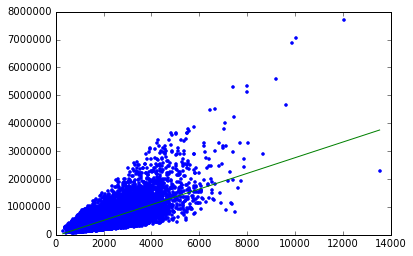

In [36]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
        poly1_data['power_1'], model1.predict(poly1_data[['power_1']]), '-')

Let's unpack that plt.plot() command. The first pair of Series we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [72]:
# Create the data
poly2_data = polynomial_df(sales['sqft_living'], 2)

# get a list of the column names.
# poly2_data.columns returns a pandas Index with the column names
# poly2_data.columns.values returns an np.array
# poly2_data.columns.values.tolist() uses the array's helper function to make a list
# BUT, even shorter, you can do list(poly2_data)
# Note: from all that, the .tolist() method is the fastest (see: http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers)
features = poly2_data.columns.values.tolist()  # Do this before adding price in below so you don't correlate price to price...
target = 'price'

# Skippped this this time and instead just used sales['price']
# Add price in (could have just left it in its own dataframe, too...)
# poly2_data['price'] = sales['price']

# Create the linear_model object
model2 = linear_model.LinearRegression()

model2 = linear_model.LinearRegression()
model2.fit(poly2_data, sales[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
print(model1.intercept_)
print(model1.coef_)
print(model2.intercept_)
print(model2.coef_)

-43580.7430945
[ 280.6235679]
199222.279305
[  6.79940947e+01   3.85812609e-02]


In [66]:
# Let's take a look at the weights before we plot
print("\tintercept={:.2f}".format(model2.intercept_))
print("\tcoef(s)={}".format(model2.coef_))

	intercept=199222.28
	coef(s)=[  6.79940947e+01   3.85812609e-02]


And plotting...

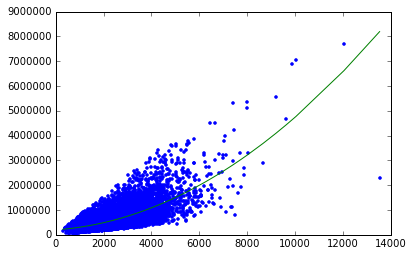

In [69]:
plt.plot(poly2_data['power_1'], poly2_data['price'], '.',
        poly2_data['power_1'], model2.predict(poly2_data[features]), '-')

And cubic...

In [89]:
# Tired of doing these by hand...
def train_power_models(data, feature, degree, target):
    """Train and return models fitting the features of data wrt target, each using polynomial fits from degree 1 to degree degree"""
    models = {}
    for d in range(1, degree+1):
        print("Making model for degree {}".format(d))
        # Make the dataset
        thisdata = polynomial_df(data[feature], d)
        
        # Make the model
        models[d] = linear_model.LinearRegression()
        models[d].fit(thisdata, data[target])
        
        # Let's take a look at the weights before we plot
        print("\tModel complete:")
        print("\tintercept={:.2f}".format(models[d].intercept_))
        print("\tcoef(s)={}".format(models[d].coef_))

    return models

def plot_power_models(data, feature, target, models):
    for d in sorted(models.keys()):
        print("Plot for model {}:".format(d))
        thisdata = polynomial_df(data[feature], d)
        plt.figure()
        plt.plot(thisdata['power_1'], data['price'], '.',
                thisdata['power_1'], models[d].predict(thisdata))
        

In [92]:
models = train_power_models(sales, 'sqft_living', 15, 'price')

Making model for degree 1
	Model complete:
	intercept=-43580.74
	coef(s)=[ 280.6235679]
Making model for degree 2
	Model complete:
	intercept=199222.28
	coef(s)=[  6.79940947e+01   3.85812609e-02]
Making model for degree 3
	Model complete:
	intercept=336819.75
	coef(s)=[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]
Making model for degree 4
	Model complete:
	intercept=197702.36
	coef(s)=[  1.14247514e+02  -4.57981162e-03   1.09013598e-05  -7.05040259e-10]
Making model for degree 5
	Model complete:
	intercept=241012.37
	coef(s)=[  4.64760441e-05   8.41632249e-02  -1.57943607e-05   2.48778826e-09
  -1.24358906e-13]
Making model for degree 6
	Model complete:
	intercept=292893.04
	coef(s)=[  7.87223076e-12   4.10355425e-08   4.06059591e-05  -1.10234827e-08
   1.19366468e-12  -4.40294453e-17]
Making model for degree 7
	Model complete:
	intercept=353942.17
	coef(s)=[  6.06213428e-19  -9.92447857e-12   6.90671386e-12   1.22820747e-08
  -3.50008547e-12   3.48088695e-16  -1.15479259e-20]


Plot for model 1:
Plot for model 2:
Plot for model 3:
Plot for model 4:
Plot for model 5:
Plot for model 6:
Plot for model 7:
Plot for model 8:
Plot for model 9:
Plot for model 10:
Plot for model 11:
Plot for model 12:
Plot for model 13:
Plot for model 14:
Plot for model 15:


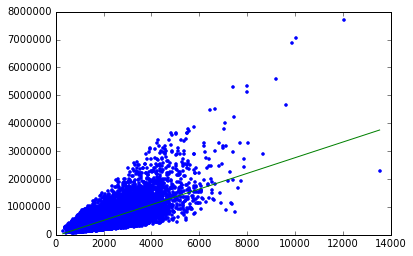

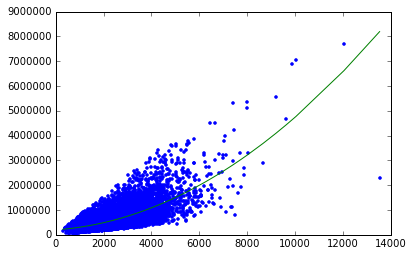

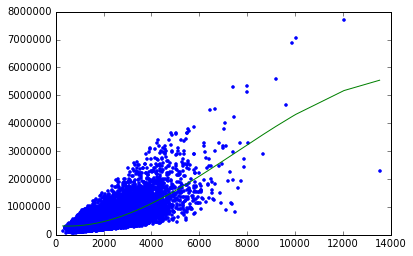

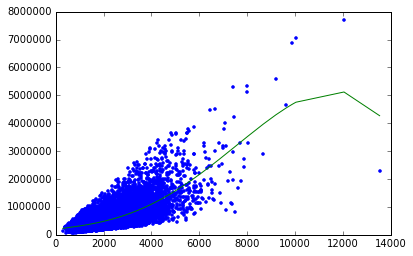

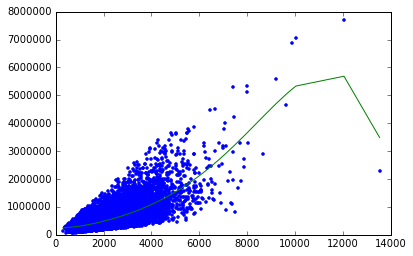

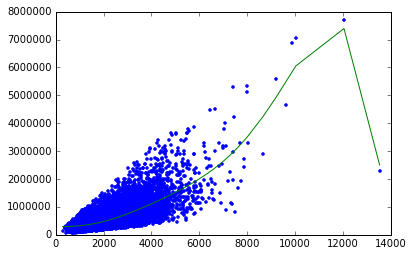

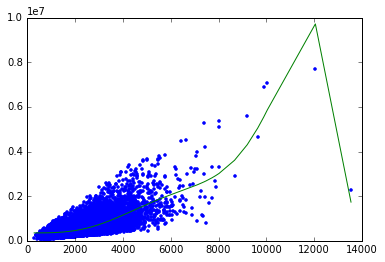

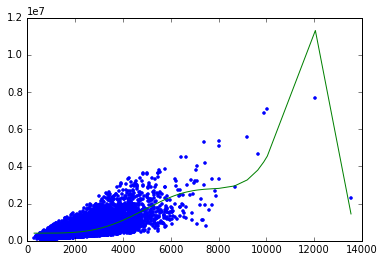

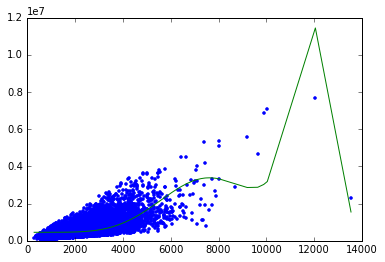

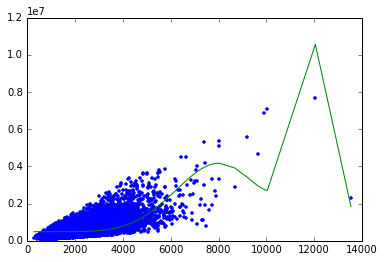

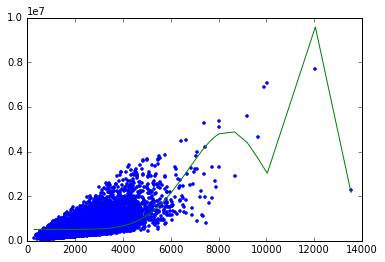

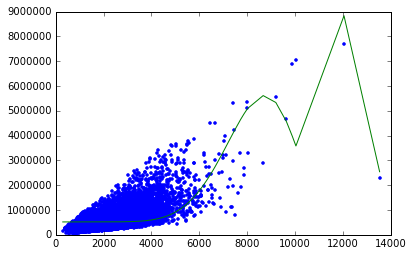

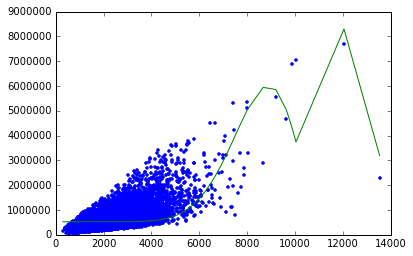

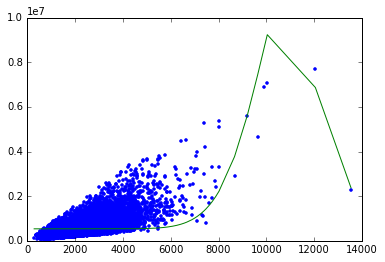

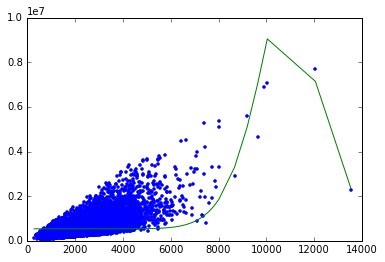

In [93]:
plot_power_models(sales, 'sqft_living', 'price', models)

Now try a 15th degree polynomial:

(see above)

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

(Datasets loaded above)

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

Making model for degree 1
	Model complete:
	intercept=-67961.93
	coef(s)=[ 293.61759115]
Making model for degree 2
	Model complete:
	intercept=112406.45
	coef(s)=[  1.44314099e+02   2.48191742e-02]
Making model for degree 3
	Model complete:
	intercept=356028.66
	coef(s)=[ -1.20097821e+02   9.89751048e-02  -5.05460769e-06]
Making model for degree 4
	Model complete:
	intercept=190653.87
	coef(s)=[  1.15707383e+02  -2.60232552e-03   1.04651441e-05  -7.00008640e-10]
Making model for degree 5
	Model complete:
	intercept=221129.83
	coef(s)=[  5.32237659e-05   9.92150807e-02  -2.16865963e-05   3.20102474e-09
  -1.51632501e-13]
Making model for degree 6
	Model complete:
	intercept=285765.30
	coef(s)=[  7.47447344e-12   1.37106356e-08   4.24654561e-05  -1.15943839e-08
   1.24354744e-12  -4.53549801e-17]
Making model for degree 7
	Model complete:
	intercept=354612.88
	coef(s)=[  5.10915270e-19  -3.02816382e-11   6.33245058e-12   1.17509732e-08
  -3.23854280e-12   3.11286323e-16  -1.00372705e-20]

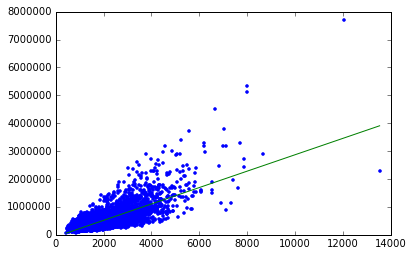

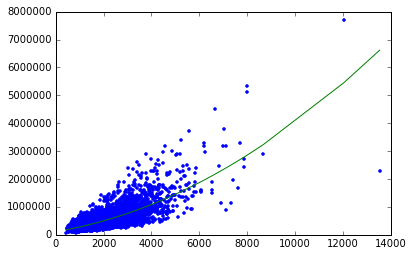

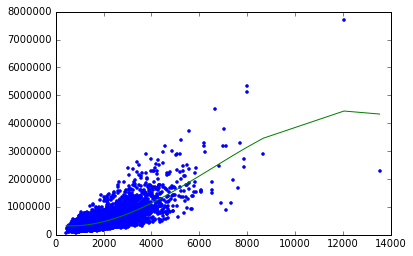

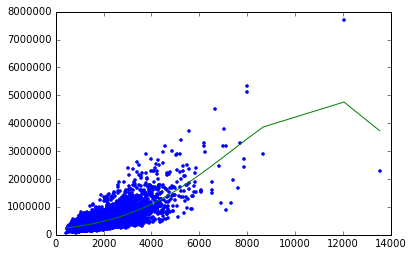

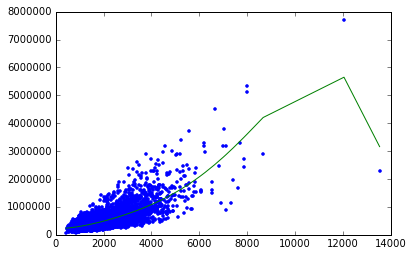

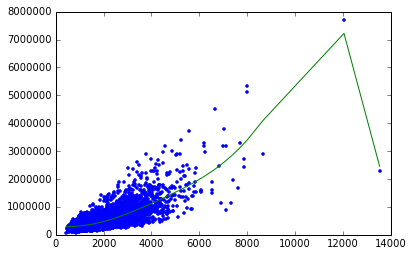

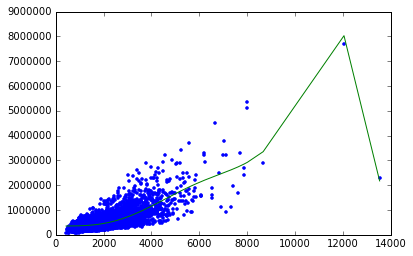

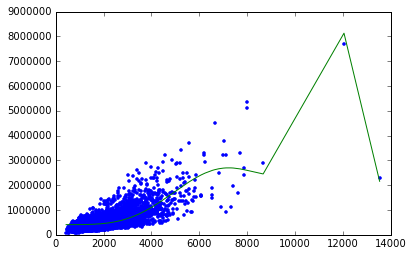

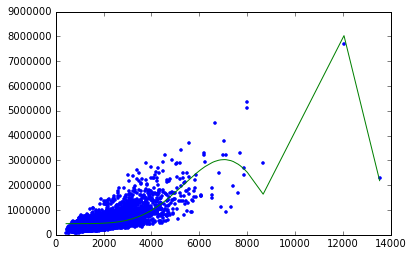

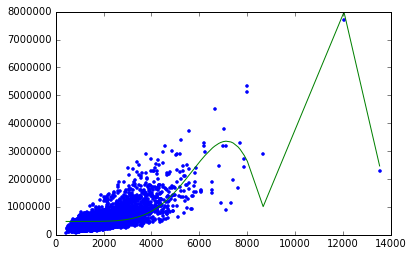

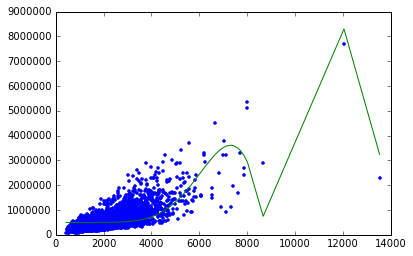

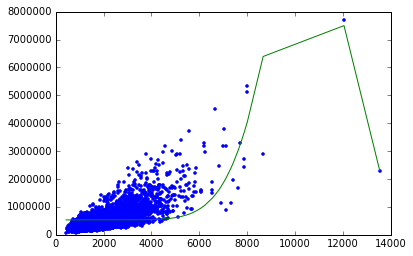

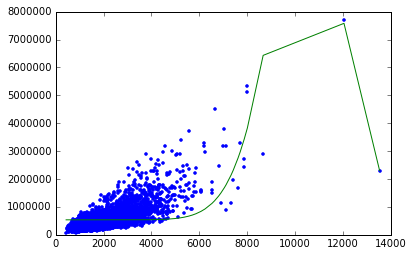

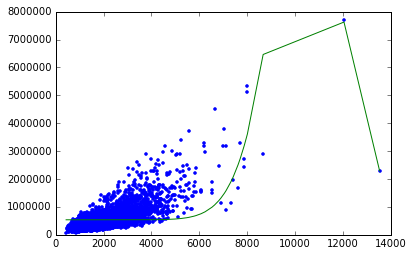

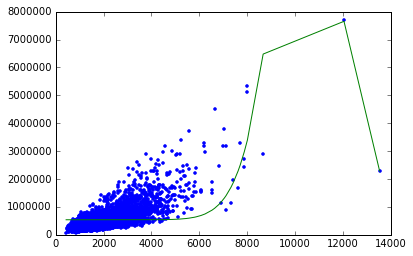

In [95]:
models_set1 = train_power_models(set_1, 'sqft_living', 15, 'price')
plot_power_models(set_1, 'sqft_living', 'price', models_set1)

Making model for degree 1
	Model complete:
	intercept=-18029.17
	coef(s)=[ 266.99416]
Making model for degree 2
	Model complete:
	intercept=242194.74
	coef(s)=[ 31.51415754   0.04459621]
Making model for degree 3
	Model complete:
	intercept=268085.14
	coef(s)=[ -1.31317178e+00   5.61665205e-02  -1.14202076e-06]
Making model for degree 4
	Model complete:
	intercept=407651.15
	coef(s)=[ -2.32054168e+02   1.77009786e-01  -2.51195921e-05   1.53002104e-09]
Making model for degree 5
	Model complete:
	intercept=332551.03
	coef(s)=[ -2.42978302e-05  -3.66950580e-02   5.36739756e-05  -1.05730107e-08
   6.36276845e-13]
Making model for degree 6
	Model complete:
	intercept=326447.43
	coef(s)=[  4.78585530e-12   1.96303250e-08   1.62152717e-05   2.63636797e-09
  -1.24791877e-12   9.21672408e-17]
Making model for degree 7
	Model complete:
	intercept=345249.74
	coef(s)=[  1.34801806e-18  -1.49783439e-12   9.89157099e-12   1.34276714e-08
  -3.85685972e-12   3.62024685e-16  -1.00982958e-20]
Making mod

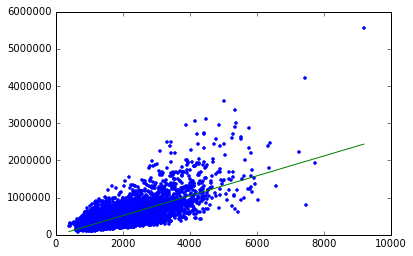

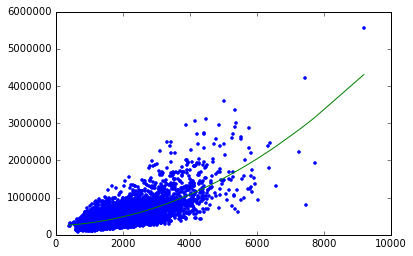

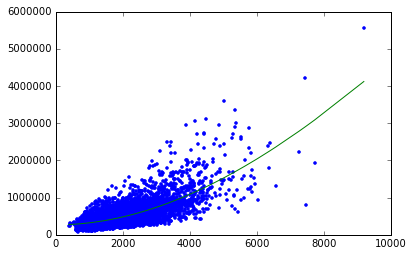

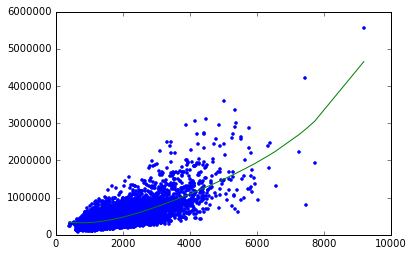

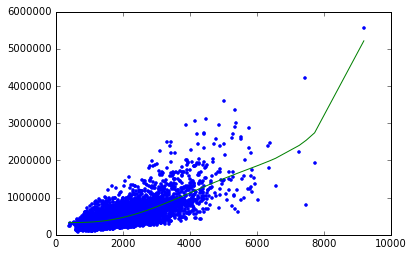

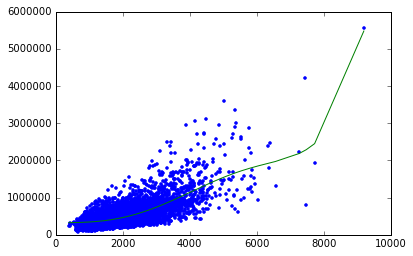

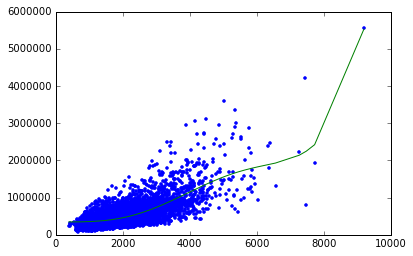

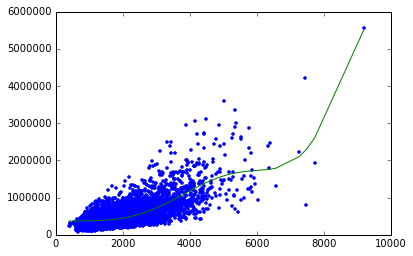

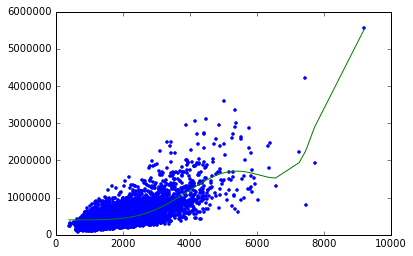

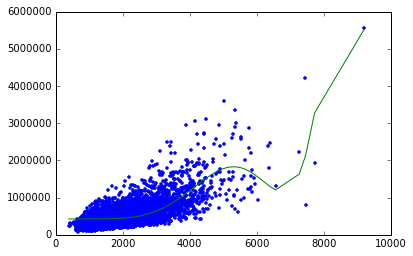

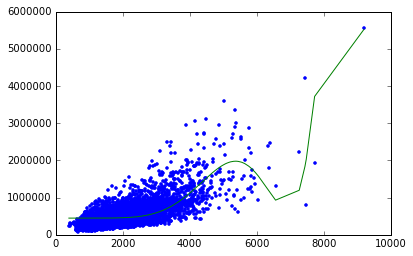

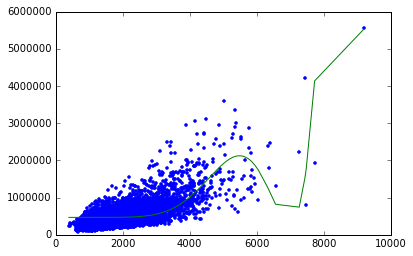

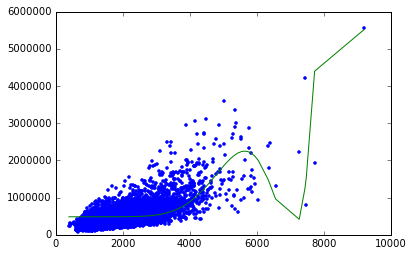

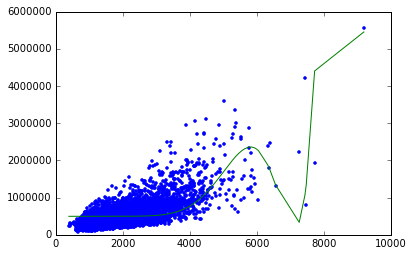

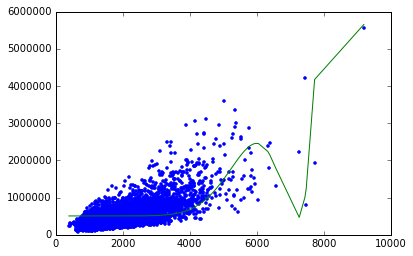

In [96]:
models_set2 = train_power_models(set_2, 'sqft_living', 15, 'price')
plot_power_models(set_2, 'sqft_living', 'price', models_set2)

Making model for degree 1
	Model complete:
	intercept=-64157.55
	coef(s)=[ 292.2118211]
Making model for degree 2
	Model complete:
	intercept=292975.31
	coef(s)=[-19.51892271   0.05626543]
Making model for degree 3
	Model complete:
	intercept=210532.63
	coef(s)=[  7.86227657e+01   2.46112255e-02   2.72133469e-06]
Making model for degree 4
	Model complete:
	intercept=367512.82
	coef(s)=[ -1.68401479e+02   1.45940553e-01  -1.93689113e-05   1.25618378e-09]
Making model for degree 5
	Model complete:
	intercept=306357.03
	coef(s)=[  1.78697777e-06   2.77825823e-03   2.96977635e-05  -5.70964793e-09
   3.34573815e-13]
Making model for degree 6
	Model complete:
	intercept=317445.60
	coef(s)=[  7.23338272e-12   2.76802878e-08   2.56531804e-05  -3.07532735e-09
  -1.24541078e-13   2.39720267e-17]
Making model for degree 7
	Model complete:
	intercept=347820.39
	coef(s)=[  1.23387219e-18  -7.62788134e-12   9.71077848e-12   1.38294014e-08
  -4.16446054e-12   4.36555076e-16  -1.52083592e-20]
Making m

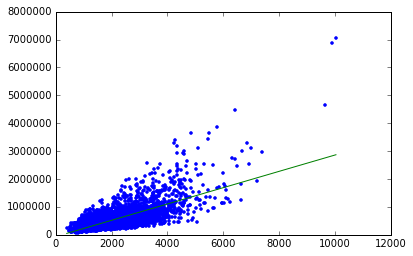

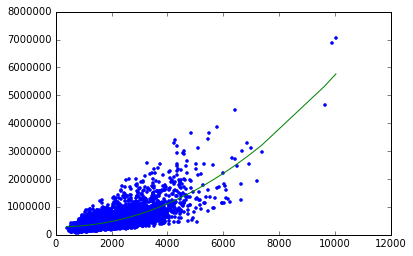

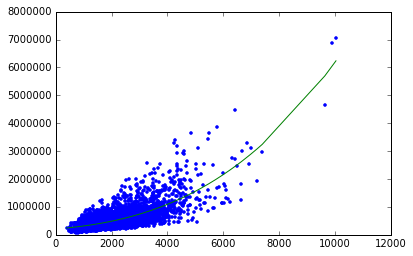

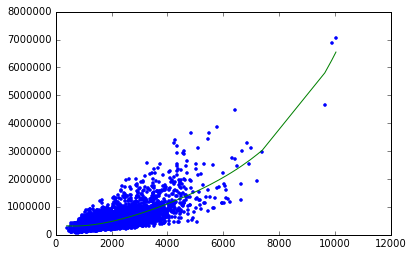

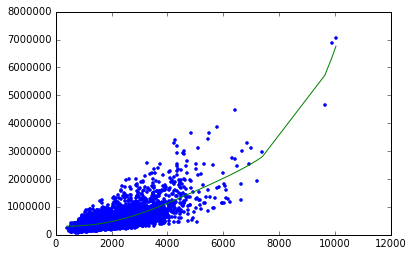

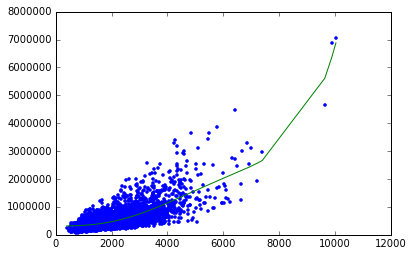

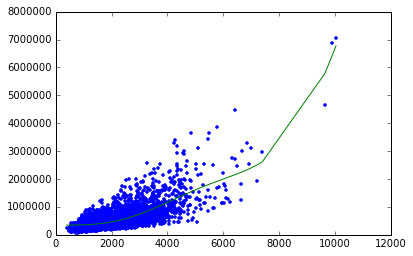

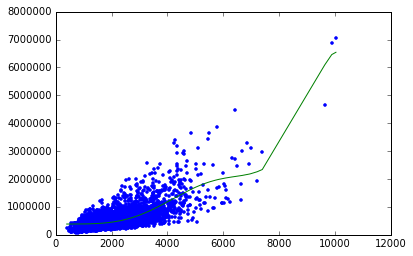

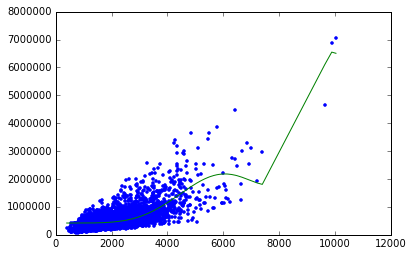

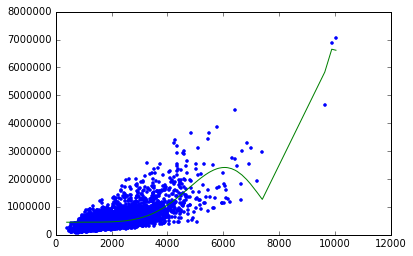

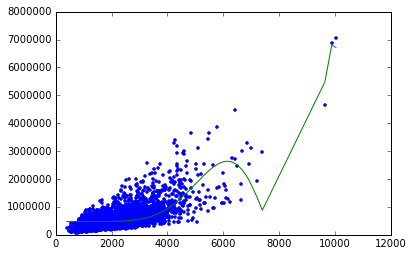

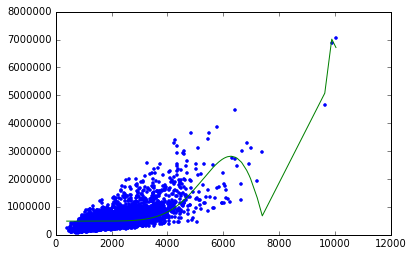

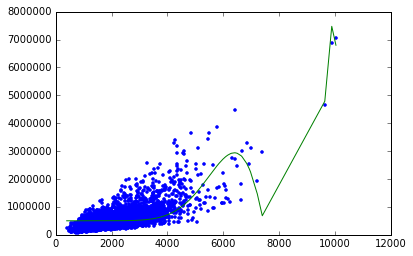

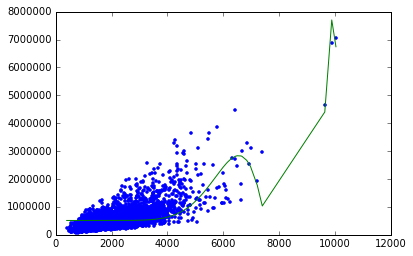

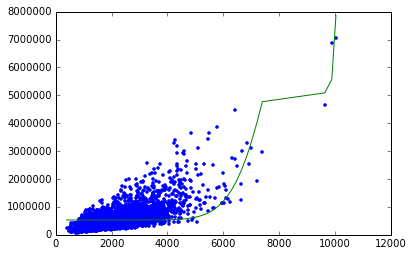

In [98]:
models_set3 = train_power_models(set_3, 'sqft_living', 15, 'price')
plot_power_models(set_3, 'sqft_living', 'price', models_set3)

Making model for degree 1
	Model complete:
	intercept=-17495.73
	coef(s)=[ 266.3336954]
Making model for degree 2
	Model complete:
	intercept=257300.51
	coef(s)=[ 11.97397116   0.04986364]
Making model for degree 3
	Model complete:
	intercept=302260.77
	coef(s)=[ -4.72887637e+01   7.18378506e-02  -2.31494305e-06]
Making model for degree 4
	Model complete:
	intercept=251317.95
	coef(s)=[  4.20538368e+01   2.15296184e-02   8.58687514e-06  -7.72884344e-10]
Making model for degree 5
	Model complete:
	intercept=292600.07
	coef(s)=[  1.46086615e-05   2.03584155e-02   1.86538079e-05  -3.49696126e-09
   2.00174605e-13]
Making model for degree 6
	Model complete:
	intercept=311654.51
	coef(s)=[  9.55282723e-12   5.65683205e-09   2.74979366e-05  -3.93963221e-09
  -2.62129578e-14   2.34143205e-17]
Making model for degree 7
	Model complete:
	intercept=335641.32
	coef(s)=[  2.16105942e-18  -1.99214587e-11   1.35960346e-11   1.69035044e-08
  -5.82987691e-12   7.20158897e-16  -3.04169464e-20]
Making m

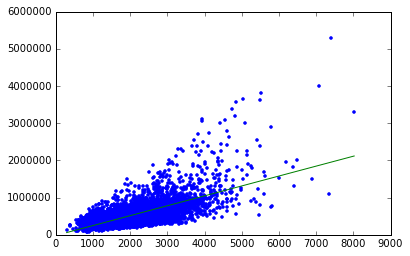

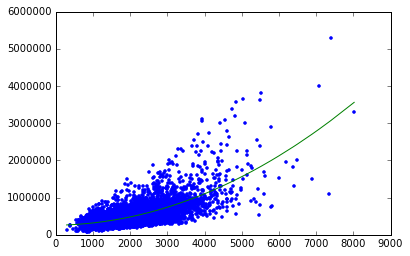

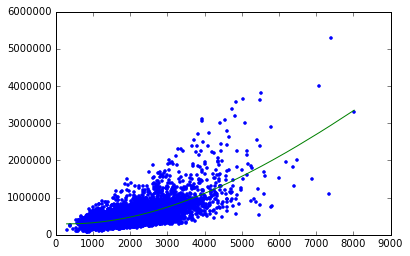

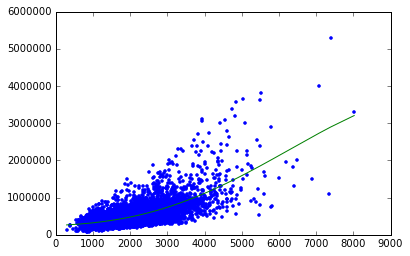

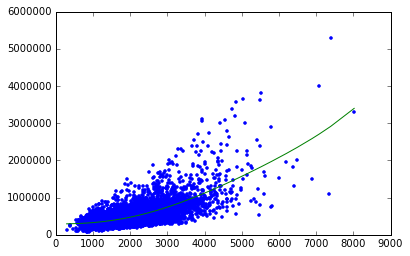

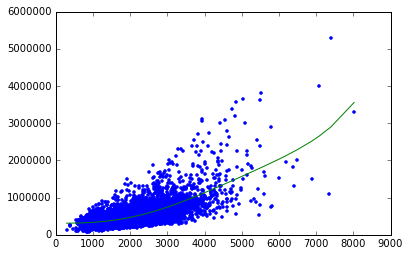

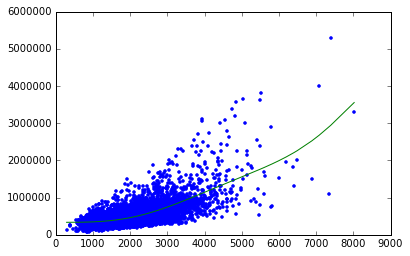

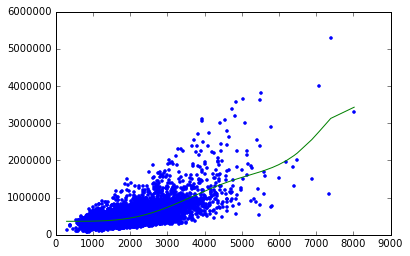

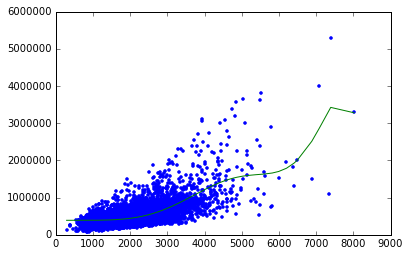

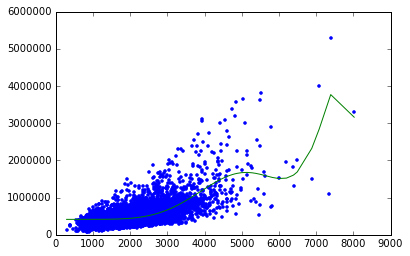

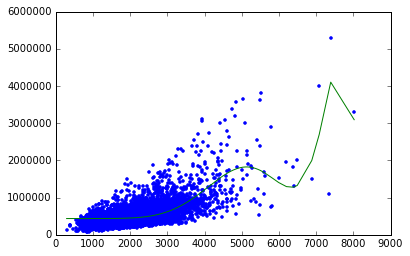

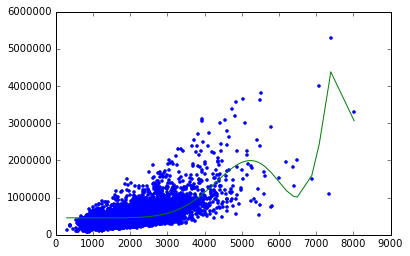

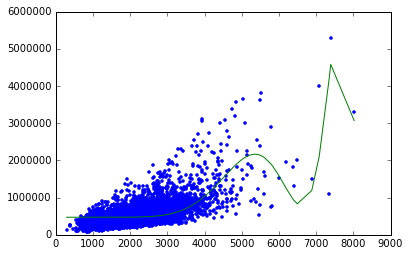

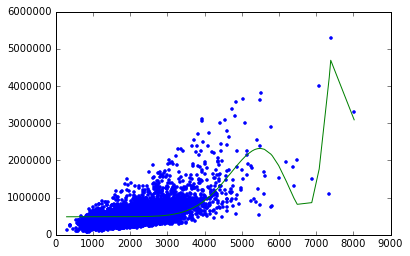

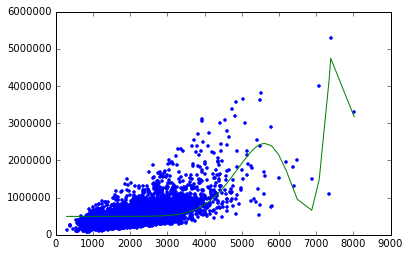

In [97]:
models_set4 = train_power_models(set_4, 'sqft_living', 15, 'price')
plot_power_models(set_4, 'sqft_living', 'price', models_set4)

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

ANSWER: No (2+, 2-)

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**
ANSWER: No

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [111]:
models_train = {}
predicted = {}
RSS = {}
for d in range(1, 15+1):
    # Make the training database and train the model
    this_train = polynomial_df(train['sqft_living'], d)
    models_train[d] = linear_model.LinearRegression()
    models_train[d].fit(this_train, train['price'])

    # Make the validation database, predict with that data, and compute RSS
    this_validation = polynomial_df(valid['sqft_living'], d)
    predicted[d] = models_train[d].predict(this_validation)
    RSS[d] = ((predicted[d] - valid['price'])**2).sum()
    print("Degree={}, RSS={}".format(d, RSS[d]))
    

Degree=1, RSS=629097886299587.4
Degree=2, RSS=623955062706519.2
Degree=3, RSS=625820280251476.8
Degree=4, RSS=629987334748835.8
Degree=5, RSS=628258900948083.9
Degree=6, RSS=566268588375943.2
Degree=7, RSS=1073846887391210.0
Degree=8, RSS=7088012729197231.0
Degree=9, RSS=4.529521667195488e+16
Degree=10, RSS=2.4743793250538333e+17
Degree=11, RSS=1.174283057542819e+18
Degree=12, RSS=5.262102122362068e+18
Degree=13, RSS=7.616230021354714e+17
Degree=14, RSS=2.2975609250984458e+18
Degree=15, RSS=6.955038098043381e+18
{1: 629097886299587.4,
 2: 623955062706519.2,
 3: 625820280251476.8,
 4: 629987334748835.8,
 5: 628258900948083.9,
 6: 566268588375943.2,
 7: 1073846887391210.0,
 8: 7088012729197231.0,
 9: 4.529521667195488e+16,
 10: 2.4743793250538333e+17,
 11: 1.174283057542819e+18,
 12: 5.262102122362068e+18,
 13: 7.616230021354714e+17,
 14: 2.2975609250984458e+18,
 15: 6.955038098043381e+18}


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

ANSWER: Degree 6

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [124]:
# Make the test database, predict with that data, and compute RSS
test_sorted = test.sort_values(['sqft_living', 'price']) # sort for plotting - doesn't change RSS
test_power_6 = polynomial_df(test_sorted['sqft_living'], 6)
test_power_6_predicted = models_train[6].predict(test_power_6)
test_power_6_RSS = ((test_power_6_predicted - test_sorted['price'])**2).sum()
print("RSS={}".format(test_power_6_RSS))

RSS=135225109954103.12


**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**
ANSWER: RSS=135225109954103.12

# Plot the test data with the prediction from the 6th order fit

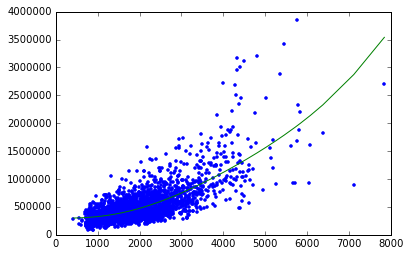

In [125]:
plt.plot(test_power_6['power_1'], test_sorted['price'], '.',
        test_power_6['power_1'], test_power_6_predicted, '-')